In [229]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
raw=pd.read_csv('train.csv')

In [4]:
raw.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [66]:
#raw.isnull().sum()

In [67]:
for idex, col in enumerate(raw.columns):
    if raw[col].isnull().sum()>1000:
        print(col)

Alley
PoolQC
Fence
MiscFeature


In [69]:
valuecount['Utilities']

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [70]:
raw.shape

(1460, 81)

In [28]:
con_list=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1']

In [29]:
con_data=raw[con_list]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

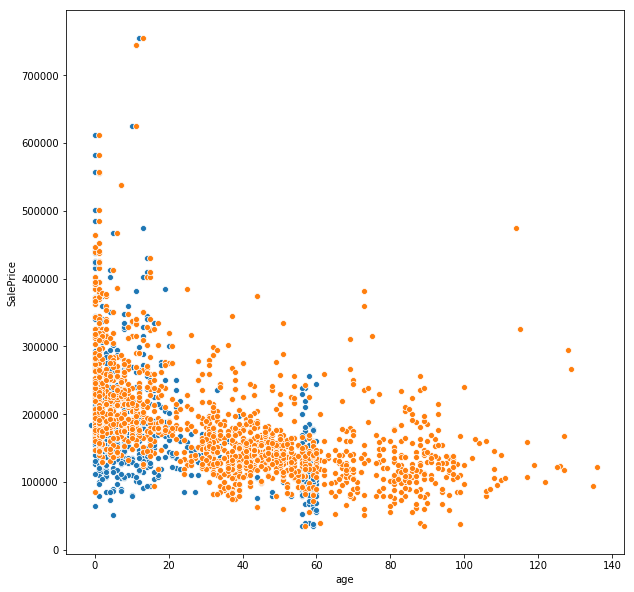

In [6]:
year=raw[['YearBuilt','YearRemodAdd','YrSold','SalePrice']]
year['age']=year['YrSold']-year['YearBuilt']
year['re_age']=year['YrSold']-year['YearRemodAdd']
year['re_built']=year['YearRemodAdd']-year['YearBuilt']
year.head()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(x=year['re_age'],y=raw['SalePrice'], data=year)
sns.scatterplot(x=year['age'],y=raw['SalePrice'], data=year)


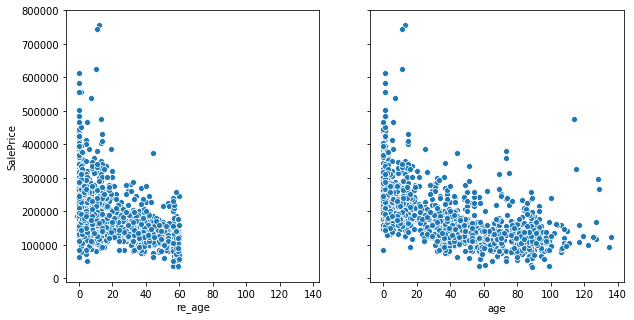

In [132]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,5))
sns.scatterplot(x=year['re_age'],y=raw['SalePrice'], data=year,ax=ax1)
sns.scatterplot(x=year['age'],y=raw['SalePrice'], data=year,ax=ax2)


In [125]:
#fig, ax = plt.subplots(figsize=(15,8))    
#sns.heatmap(raw.corr(),fmt=".2f",linewidths=.8)

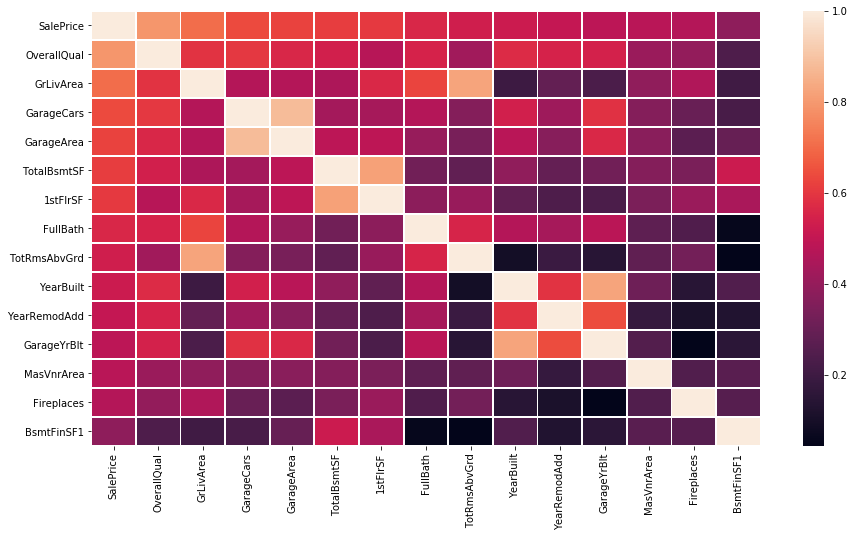

In [30]:
fig, ax = plt.subplots(figsize=(10,6))    
sns.heatmap(con_data.corr(),fmt=".2f",linewidths=.8)

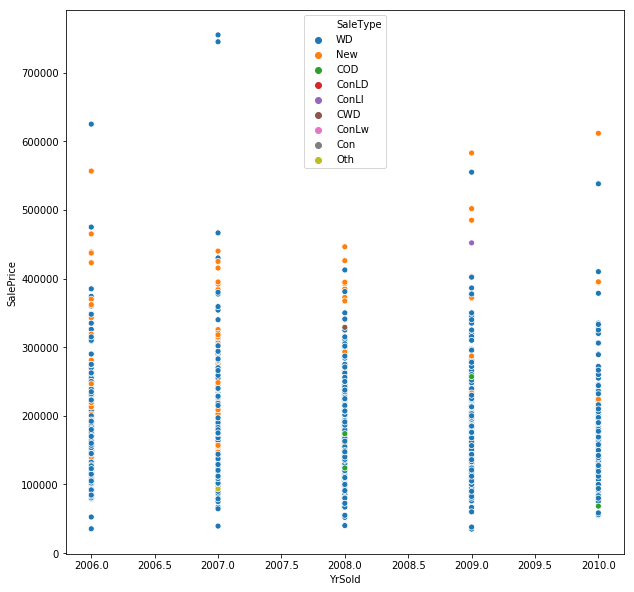

In [121]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.scatterplot(x=raw['YrSold'],y=raw['SalePrice'],hue = raw['SaleType'], data=raw)


In [123]:
raw[['GrLivArea','1stFlrSF','2ndFlrSF']].head()

GrLivArea  1stFlrSF  2ndFlrSF
0       1710       856       854
1       1262      1262         0
2       1786       920       866
3       1717       961       756
4       2198      1145      1053

In [231]:
raw['pri_per']=raw['SalePrice']/raw['LotArea']

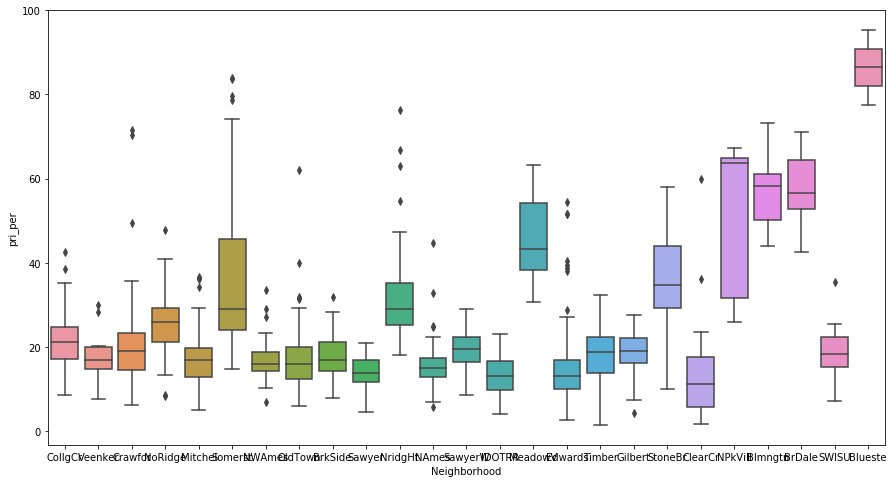

In [22]:
fig, ax = plt.subplots(figsize=(15,8))    
sns.boxplot(x=raw['Neighborhood'],y=raw['pri_per'])


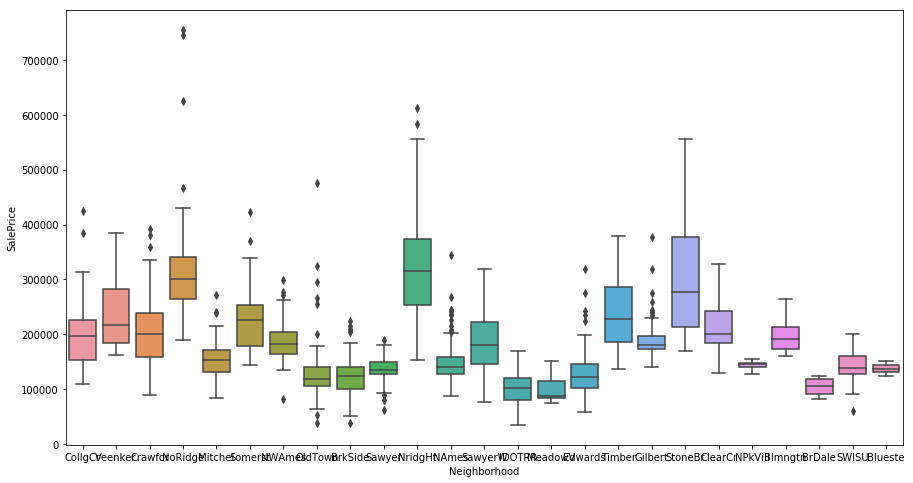

In [23]:
neigroup=raw.groupby('Neighborhood')['SalePrice']
fig, ax = plt.subplots(figsize=(15,8))    
sns.boxplot(x=raw['Neighborhood'],y=raw['SalePrice'])

In [20]:
raw['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [232]:
def handle_mv(col):
    raw[col]=np.where(raw[col].isnull()==True,'None',raw[col])


In [233]:
columns=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
handle_mv(columns)

In [234]:

raw=raw.drop(columns=['MSSubClass','PoolArea','1stFlrSF','2ndFlrSF','MiscFeature','GarageYrBlt'])
raw.head()


Id MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0   1       RL         65.0     8450   Pave  None      Reg         Lvl   
1   2       RL         80.0     9600   Pave  None      Reg         Lvl   
2   3       RL         68.0    11250   Pave  None      IR1         Lvl   
3   4       RL         60.0     9550   Pave  None      IR1         Lvl   
4   5       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig    ...     ScreenPorch PoolQC Fence MiscVal MoSold  \
0    AllPub    Inside    ...               0   None  None       0      2   
1    AllPub       FR2    ...               0   None  None       0      5   
2    AllPub    Inside    ...               0   None  None       0      9   
3    AllPub    Corner    ...               0   None  None       0      2   
4    AllPub       FR2    ...               0   None  None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice    pri_per  
0   2008        WD         Normal     208500  24.674556  
1   2007        WD         Normal     181500  18.906250  
2   2008        WD         Normal     223500  19.866667  
3   2006        WD        Abnorml     140000  14.659686  
4   2008        WD         Normal     250000  17.531557  

[5 rows x 76 columns]

In [235]:
raw['age']=raw['YrSold']-raw['YearBuilt']
raw['re_age']=raw['YrSold']-raw['YearRemodAdd']
raw['re_built']=raw['YearRemodAdd']-raw['YearBuilt']

In [236]:
raw['porch']=np.nan
for porch in [col for col in raw.columns if 'Porch' in col]:
    raw['porch']=raw['porch'].fillna(raw[porch],inplace=True)


In [245]:
len(raw['porch'])

1460

In [238]:
raw=raw.drop(columns=['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

In [239]:
raw['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [240]:
raw['Fence'] = [0 if x==None else 1 if x=='MnPrv'or x=='MnWw'else 2 for 
                     x in raw['Fence']]

In [241]:
valuecount={}
for idex, col in enumerate(raw.columns):
    valuecount[col]= raw[col].value_counts()
    

In [242]:
li={k:valuecount[k] for k in valuecount if len(valuecount[k])<17}

In [243]:
key_list=list(li.keys())

In [244]:
raw[raw.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
HalfBath        0.284108
pri_per         0.273401
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
Fence           0.150374
MoSold          0.046432
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
KitchenAbvGr   -0.135907
re_built       -0.217503
re_age         -0.509079
age            -0.523350
Name: SalePrice, dtype: float64

In [166]:
def cate_count(col):
    group=raw.groupby(col)
    s=group.agg(['count']).iloc[:,0]
    s.to_dict()
    return s

cate_count('Neighborhood')


Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: (Id, count), dtype: int64

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,5))
sns.scatterplot(x=year['re_age'],y=raw['SalePrice'], data=year,ax=ax1)
sns.scatterplot(x=year['age'],y=raw['SalePrice'], data=year,ax=ax2)


In [168]:
len(li.keys())

54

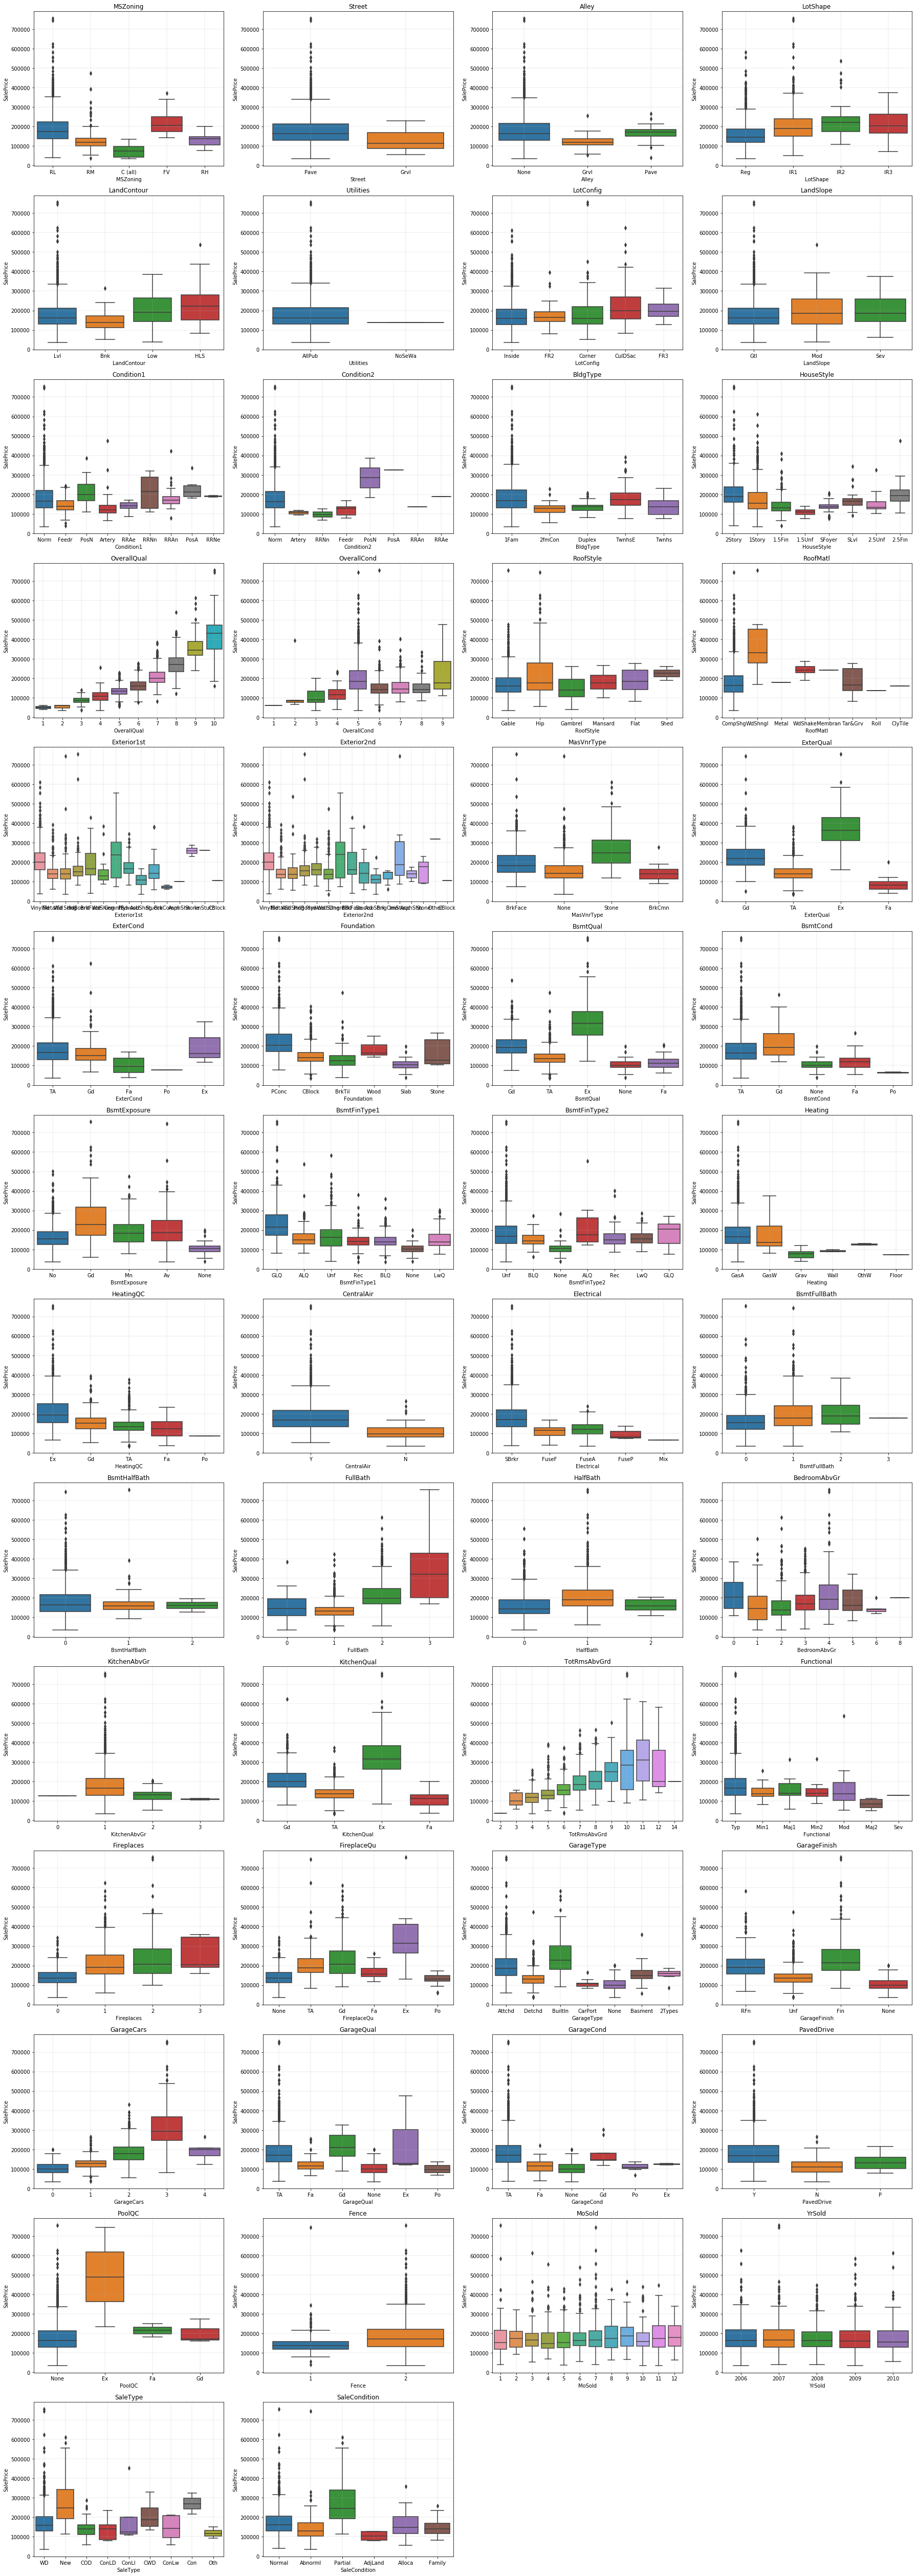

In [183]:
plt.figure(figsize=(25,70))

plot_number = 1
for col in list(li.keys()):
    
    ax = plt.subplot(14, 4, plot_number)
    sns.boxplot(x=raw[col], y=raw['SalePrice'], ax=ax)
    ax.grid(linewidth=0.25)
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()
plt.savefig('boxplot_categorical.png')

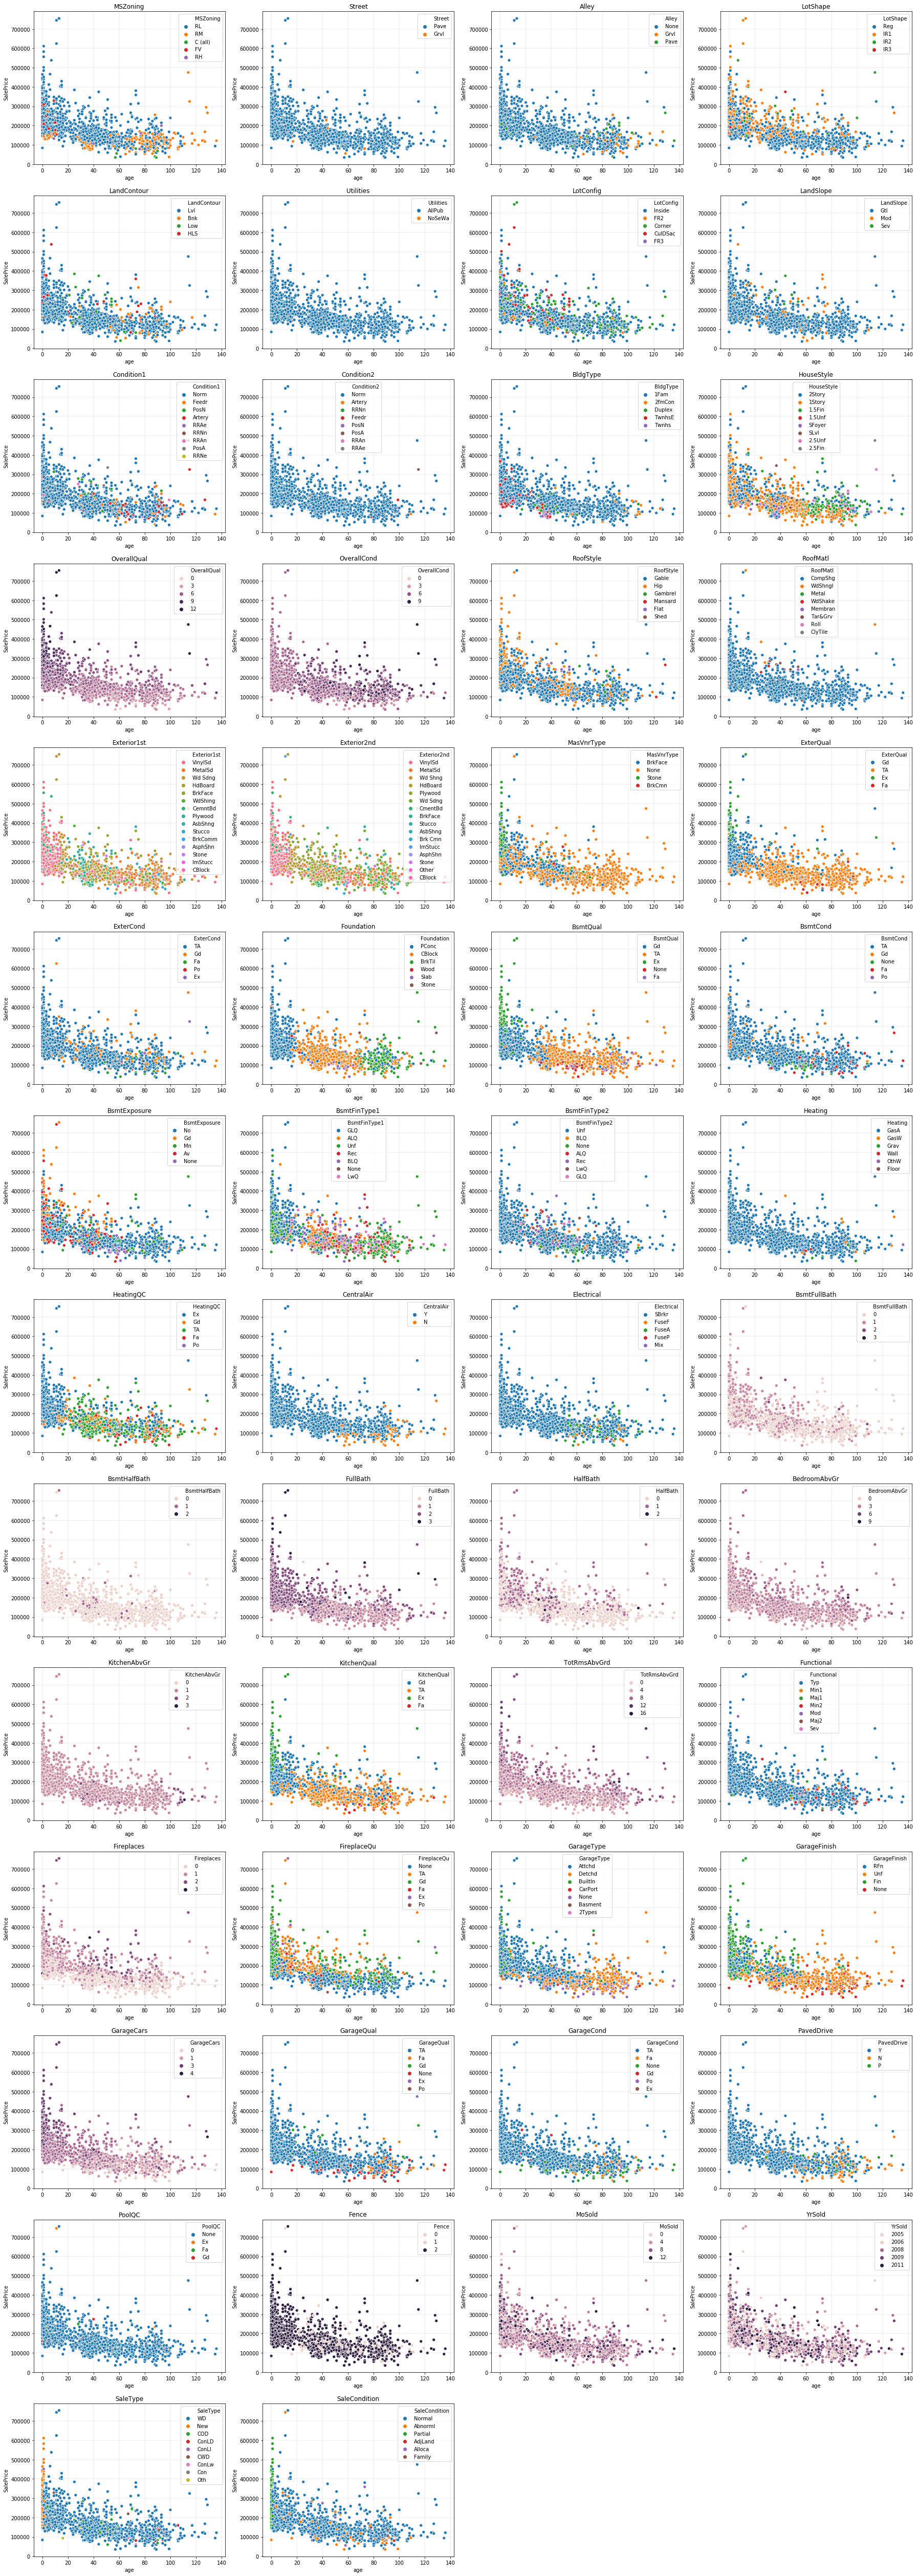

In [194]:
plt.figure(figsize=(25,70))

plot_number = 1
for col in list(li.keys()):
    
    ax = plt.subplot(14, 4, plot_number)
    sns.scatterplot(x=raw['age'], y=raw['SalePrice'],hue=raw[col],ax=ax)
    ax.grid(linewidth=0.25)
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()
plt.savefig('scatterplot_categorical.png')

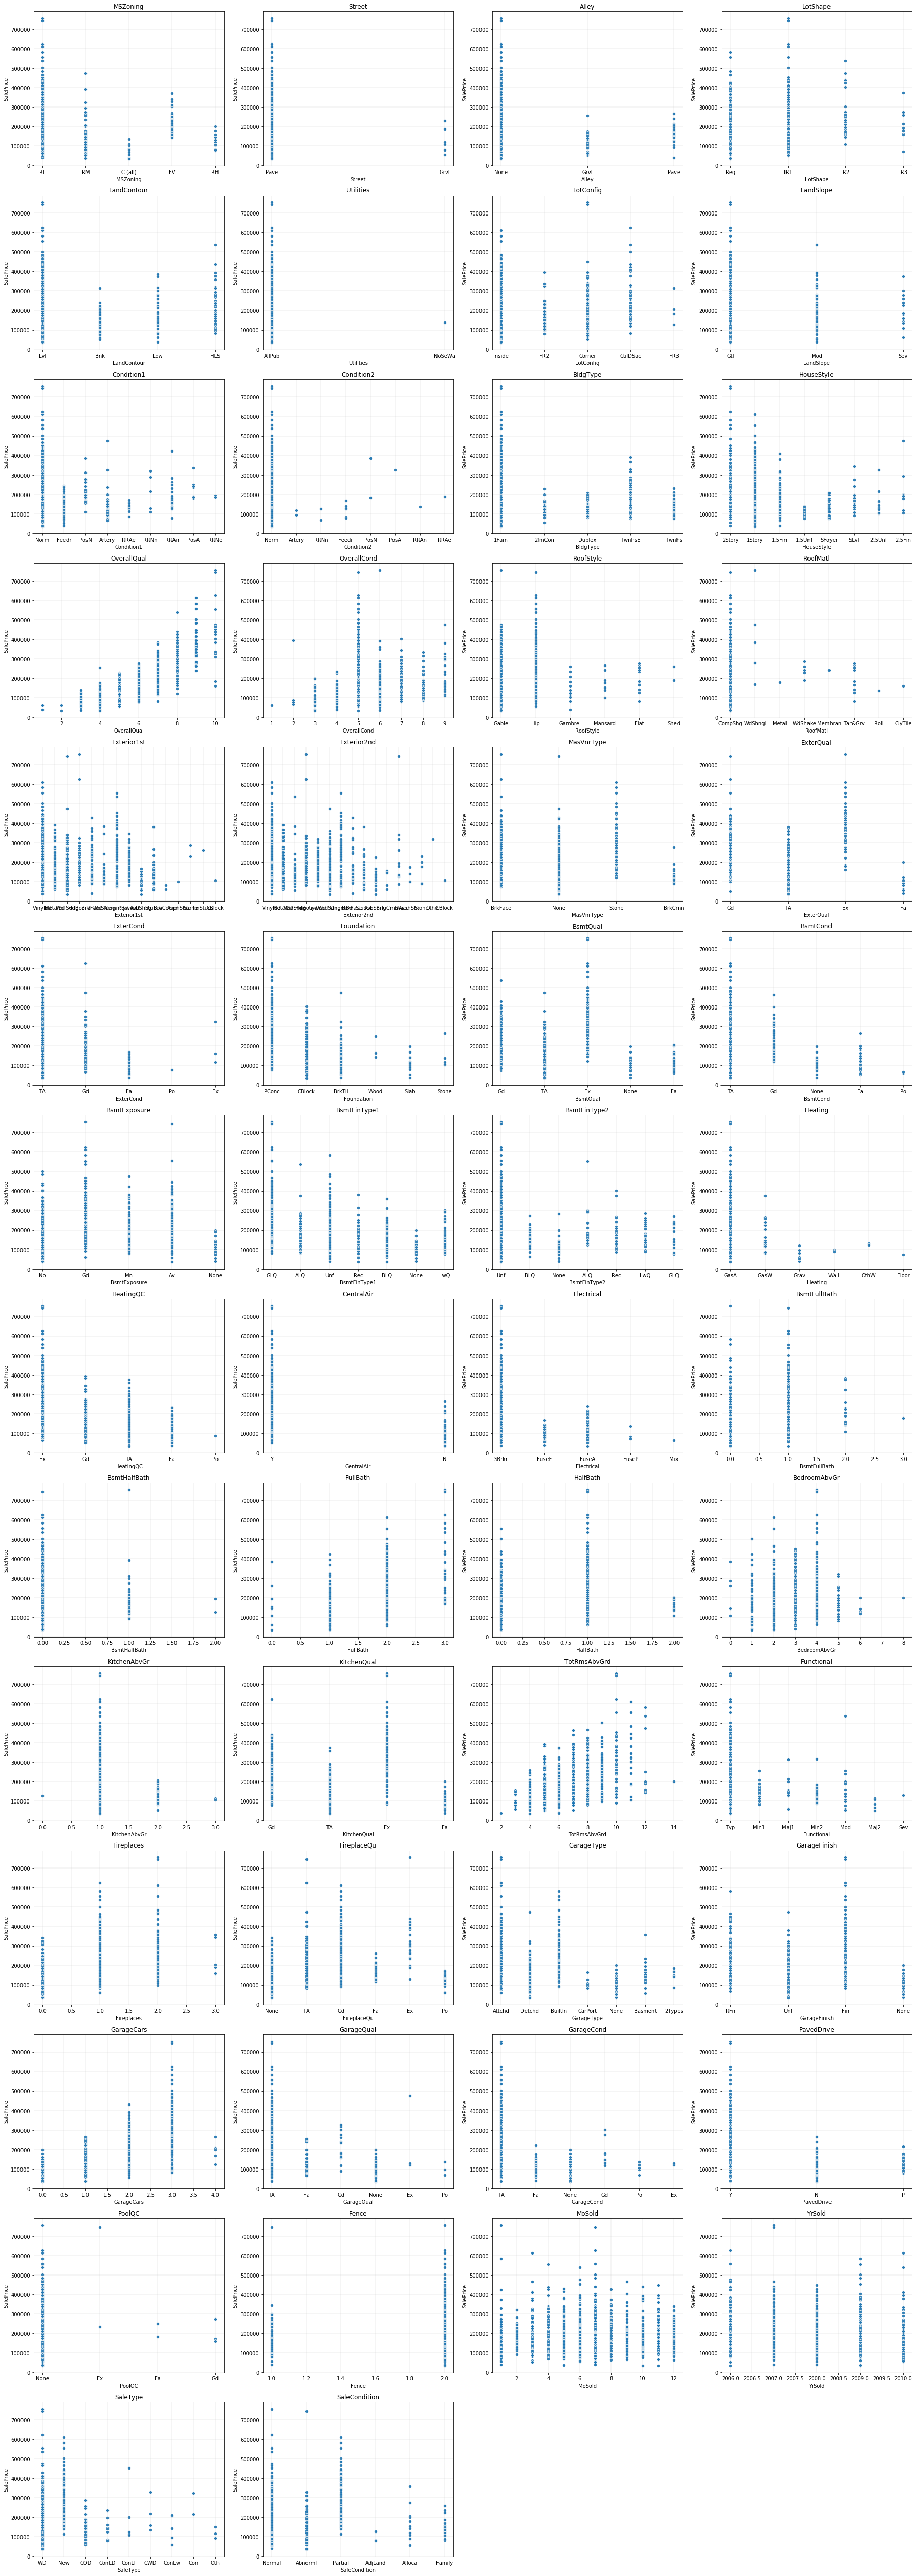

In [185]:
plt.figure(figsize=(25,70))

plot_number = 1
for col in list(li.keys()):
    
    ax = plt.subplot(14, 4, plot_number)
    sns.scatterplot(x=raw[col], y=raw['SalePrice'],ax=ax)
    ax.grid(linewidth=0.25)
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()
plt.savefig('scatterplot_categorical.png')

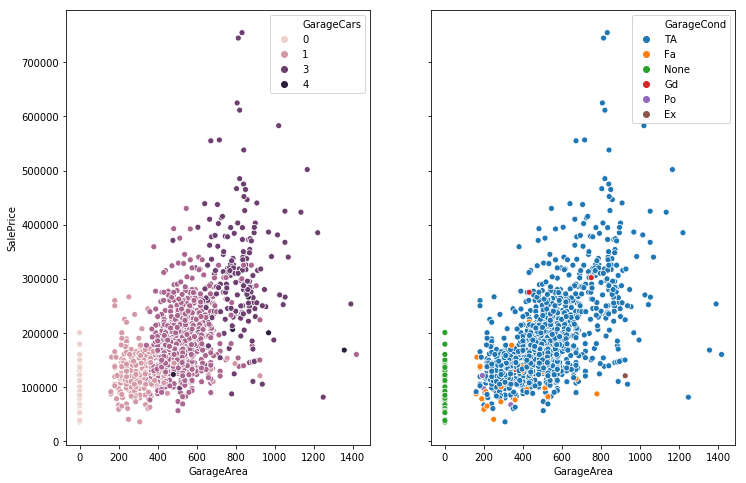

In [192]:


fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(12,8))

sns.scatterplot(x=raw['GarageArea'],y=raw['SalePrice'], hue=raw['GarageCars'],ax=ax1)
sns.scatterplot(x=raw['GarageArea'],y=raw['SalePrice'],hue=raw['GarageCond'],ax=ax2)

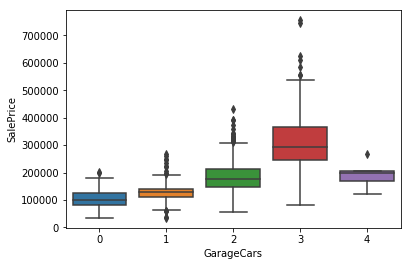

In [191]:
sns.boxplot(x=raw['GarageCars'],y=raw['SalePrice'])

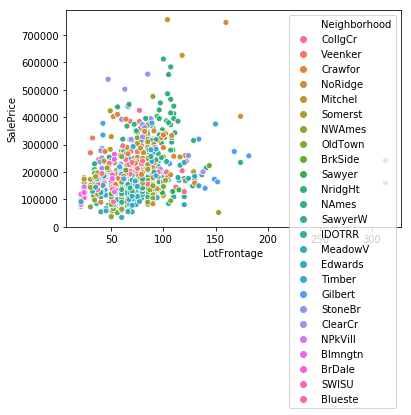

In [195]:
sns.scatterplot(x=raw['LotFrontage'],y=raw['SalePrice'], hue=raw['Neighborhood'])

(0, 500)

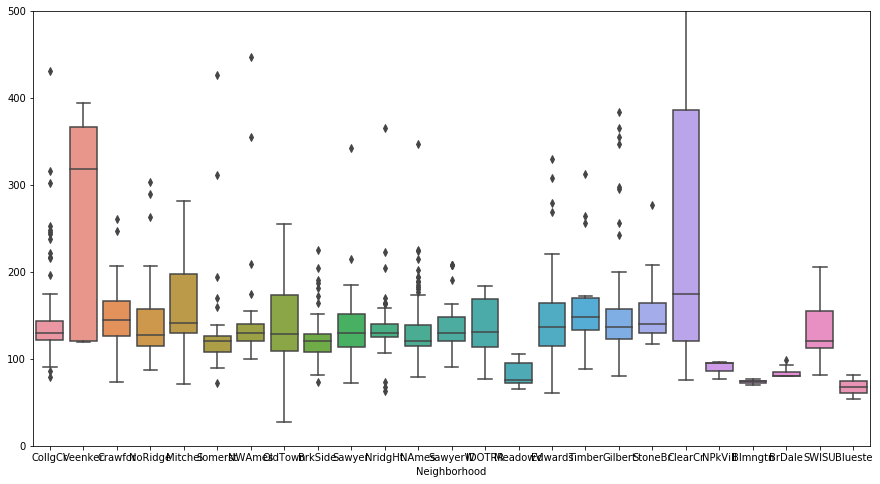

In [208]:

fig, ax = plt.subplots(figsize=(15,8)) 
sns.boxplot(x=raw['Neighborhood'],y=raw['LotArea']/raw['LotFrontage'])

plt.ylim(0,500)

(0, 200)

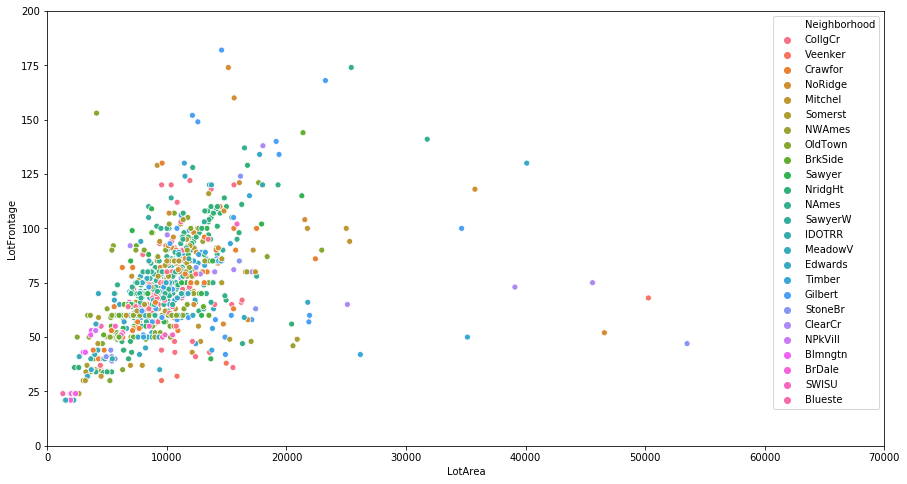

In [200]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.scatterplot(x=raw['LotArea'],y=raw['LotFrontage'],hue=raw['Neighborhood'])
plt.xlim(0, 70000)
plt.ylim(0,200)

In [222]:
group=raw.groupby('Neighborhood')['LotFrontage']
for k,v in group:
    print(k)
    miss=v.isnull().sum()
    #gap=v.sum()-miss
    print("-"*10)
    print(miss)
    #print(gap)


Blmngtn
----------
3
Blueste
----------
0
BrDale
----------
0
BrkSide
----------
7
ClearCr
----------
15
CollgCr
----------
24
Crawfor
----------
10
Edwards
----------
8
Gilbert
----------
30
IDOTRR
----------
3
MeadowV
----------
2
Mitchel
----------
13
NAmes
----------
39
NPkVill
----------
2
NWAmes
----------
28
NoRidge
----------
8
NridgHt
----------
1
OldTown
----------
4
SWISU
----------
2
Sawyer
----------
26
SawyerW
----------
9
Somerst
----------
8
StoneBr
----------
5
Timber
----------
8
Veenker
----------
4


In [223]:
def cate_count(col):
    group=raw.groupby(col)
    s=group.agg(['count']).iloc[:,0]
    s.to_dict()
    return s

cate_count('Neighborhood')

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: (Id, count), dtype: int64

In [251]:
con_var = ['LotFrontage','LotArea','age','re_age','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','LowQualFinSF',
           'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
           'WoodDeckSF',
           'MiscVal']

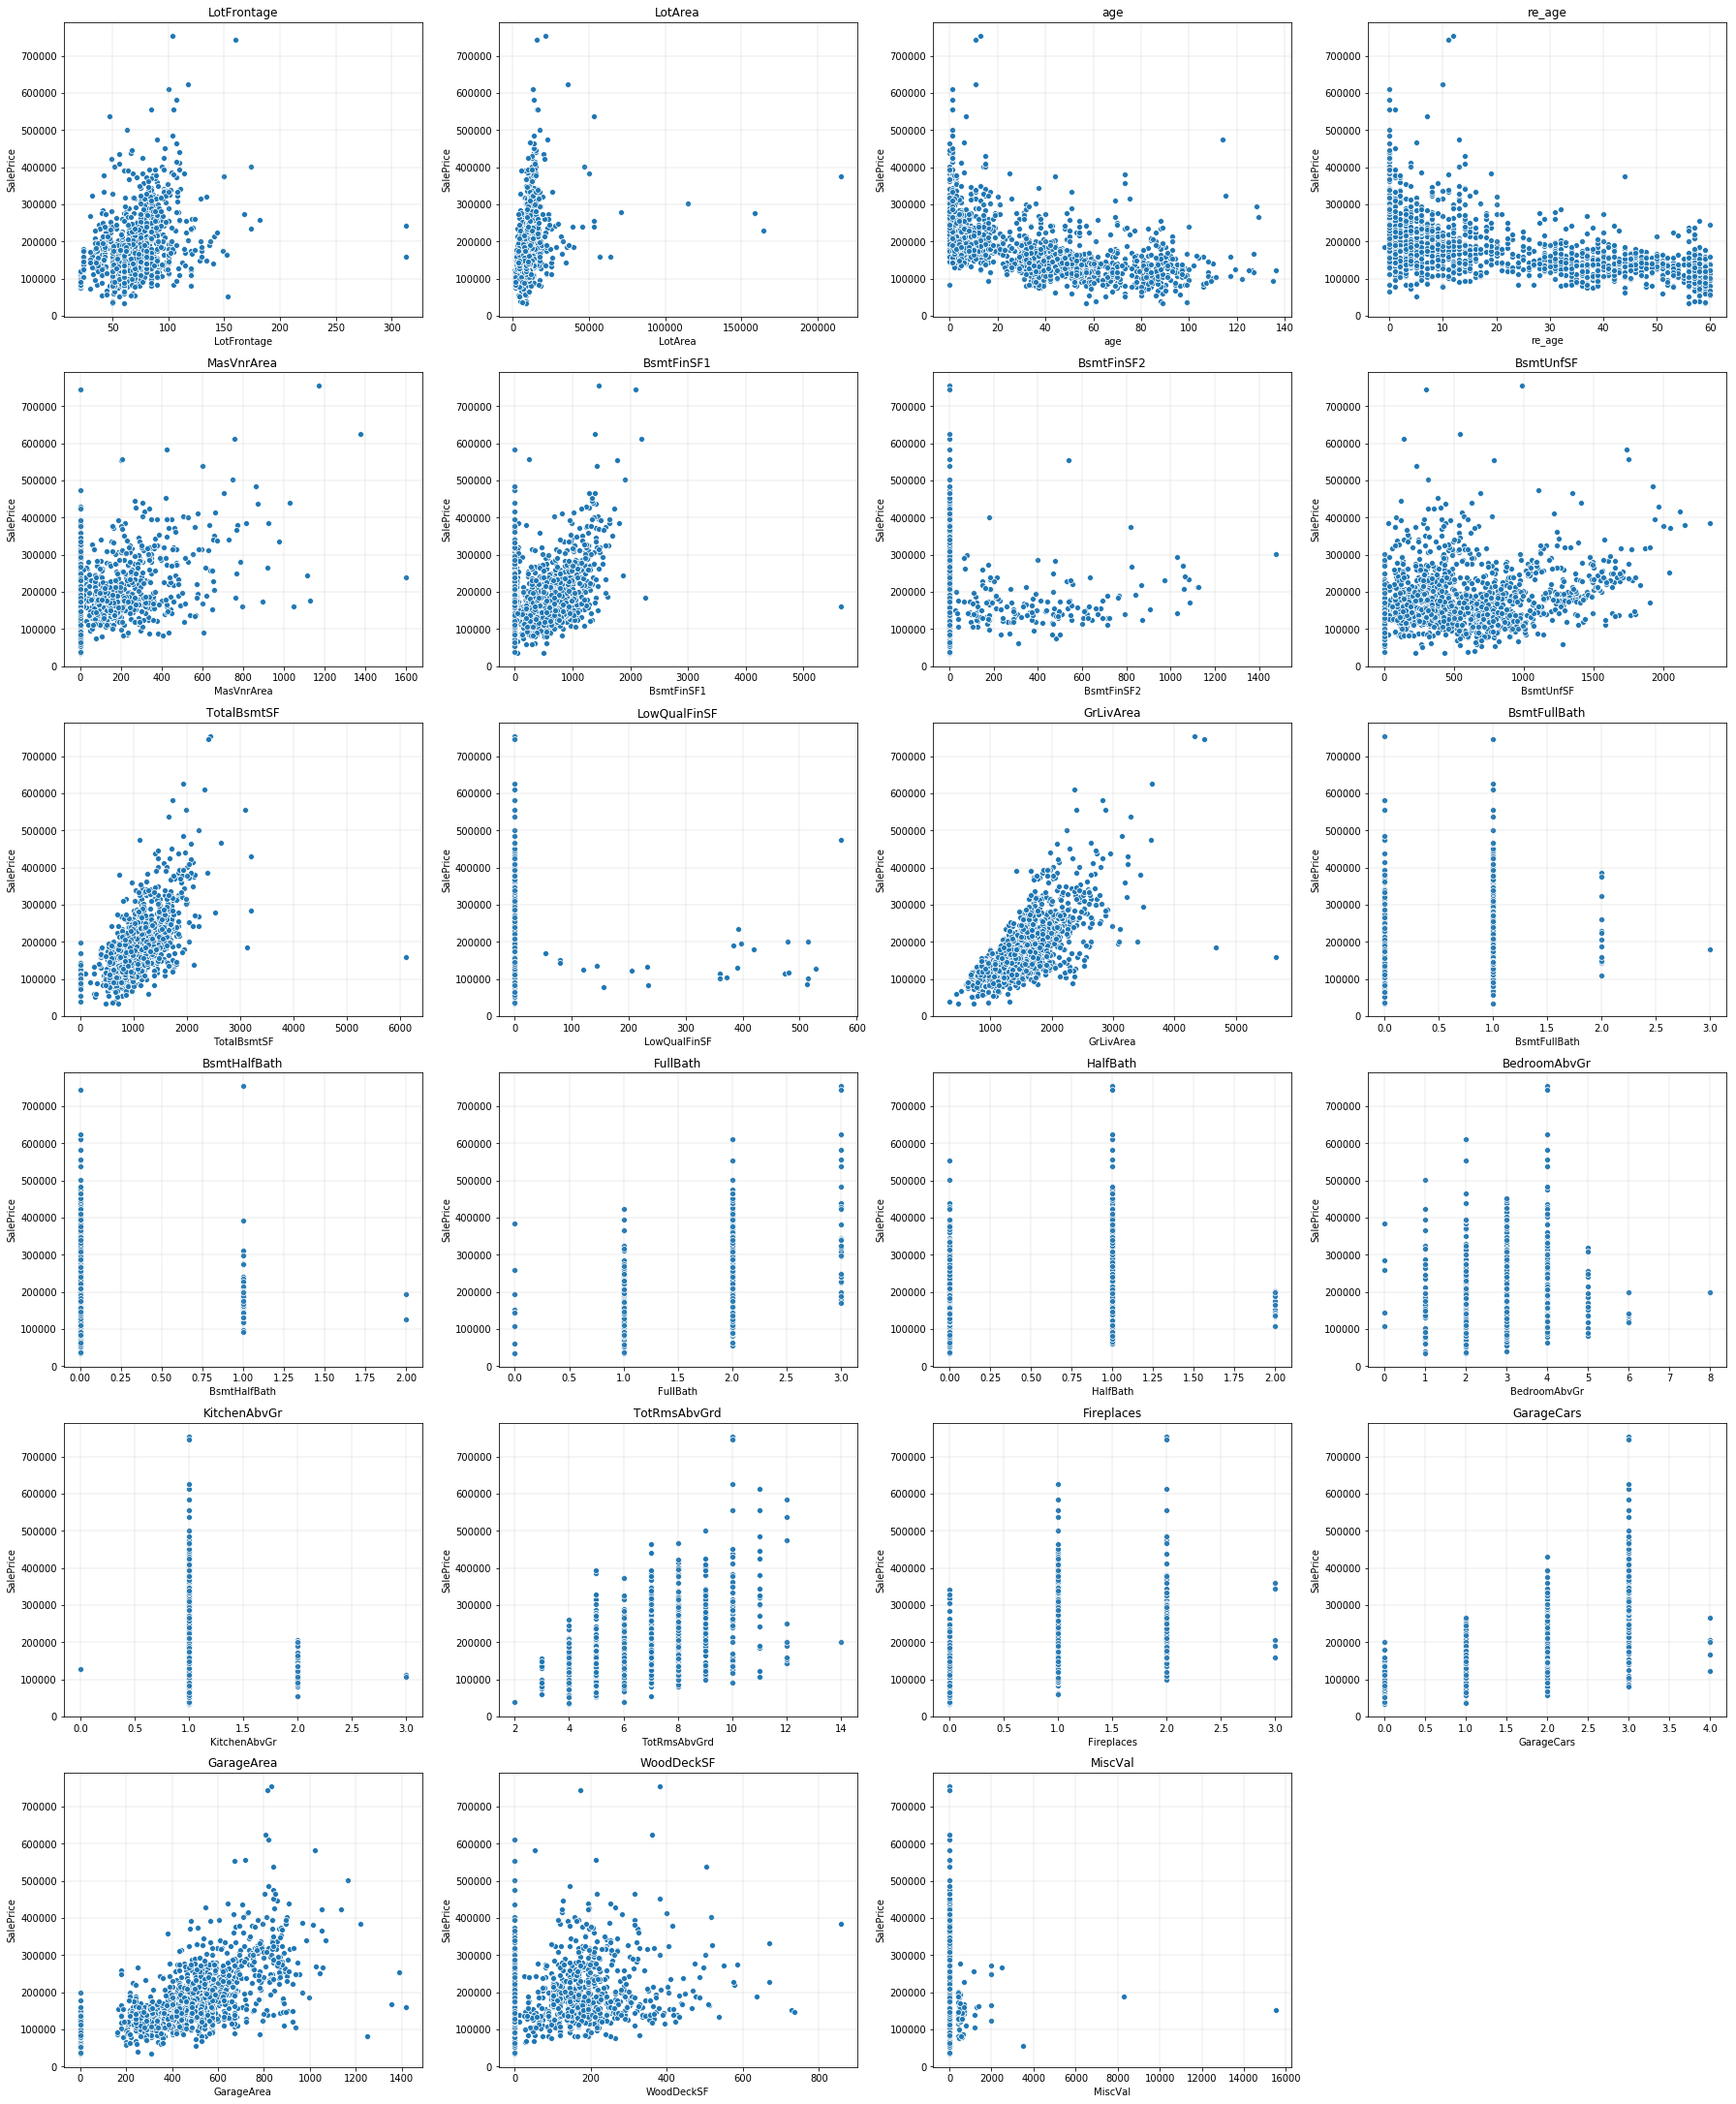

In [254]:
plt.figure(figsize=(25,70))

plot_number = 1
for col in con_var:
    
    ax = plt.subplot(14, 4, plot_number)
    sns.scatterplot(x=raw[col], y=raw['SalePrice'],ax=ax)
    ax.grid(linewidth=0.25)
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()